# 여행 상품 신청 여부 예측 경진대회

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [2]:
sns.set_theme(style='white')

In [3]:
os.chdir('C:\\Users\\Jaesu\\github_desktop\\Dacon-Basic\\여행상품-신청여부-예측')

In [4]:
df = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')
submission = pd.read_csv('./Data/sample_submission.csv')

|변수 이름|세부 사항|
|:-:|:-:|
|id | 샘플 아이디|
|Age | 나이|
|TypeofContact | 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)|
|CityTier | 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급)| 
|DurationOfPitch | 영업 사원이 고객에게 제공하는 프레젠테이션 기간|
|Occupation | 직업|
|Gender | 성별|
|NumberOfPersonVisiting | 고객과 함께 여행을 계획 중인 총 인원|
|NumberOfFollowups | 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수|
|ProductPitched | 영업 사원이 제시한 상품|
|PreferredPropertyStar | 선호 호텔 숙박업소 등급|
|MaritalStatus | 결혼여부|
|NumberOfTrips | 평균 연간 여행 횟수|
|Passport | 여권 보유 여부 (0: 없음, 1: 있음)|
|PitchSatisfactionScore | 영업 사원의 프레젠테이션 만족도|
|OwnCar | 자동차 보유 여부 (0: 없음, 1: 있음)|
|NumberOfChildrenVisiting | 함께 여행을 계획 중인 5세 미만의 어린이 수|
|Designation | (직업의) 직급|
|MonthlyIncome | 월 급여|
|ProdTaken | 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)|

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [9]:
df.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [8]:
df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


`-` 시각화를 위해 target의 범주명을 바꾸겠다

In [5]:
df['ProdTaken'] = df['ProdTaken'].map({1:'Apply', 0:'NotApply'})

## EDA

### 범주형 변수 시각화

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

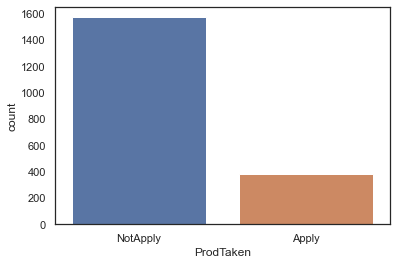

In [22]:
sns.countplot(data=df, x='ProdTaken')

`-` 여행상품을 신청한 사람은 전체의 20%, 신청하지 않은 사람은 전체의 80% 이다

`-` 라벨 불균형이 심하다

`-` 설계한 모델의 정확도는 최소 80%는 넘어야 한다

In [6]:
category_features = ['TypeofContact', 'CityTier', 'Occupation',
                     'Gender', 'NumberOfPersonVisiting',
                     'NumberOfFollowups', 'ProductPitched',
                     'PreferredPropertyStar', 'MaritalStatus',
                     'NumberOfTrips', 'Passport',
                     'PitchSatisfactionScore', 'OwnCar',
                     'NumberOfChildrenVisiting', 'Designation',
                     'ProdTaken']

In [151]:
def show_unique_counts(df_: pd.DataFrame, target: str, row: int, column: int) -> None:
    """ df의 변수 중에서 범주형 변수의 unique한 값의 개수를 시각화하는 함수"""
    df = df_.copy()
    df = df.dropna()  ## 결측치 제거
    df[category_features] = df[category_features].astype('str')  ## 숫자로 코딩된 범주형 변수의 타입을 문자형으로 변경
    features = df.columns[(df.dtypes == 'object') | (df.dtypes == 'category')]
    fig, axs = plt.subplots(row, column, figsize=(16, 40))
    
    for i, feature in enumerate(features):
        ax = axs[i // column][i % column]
        gg = sns.histplot(data=df, y=feature, hue=target, multiple='stack', shrink=0.8, discrete=True, ax=ax)
        fig.canvas.draw()
        
        order = [label.get_text() for label in gg.get_yticklabels()]
        max_width = max([p.get_width() for p in gg.patches]) 
        sns.move_legend(gg, 'lower right', title='ProdTaken')

        for j, p in enumerate(gg.patches):
            try:
                condition = f'{feature} == "{order[j]}"'
                aa = df.query(condition)[target].value_counts()
                text = np.round((100 * aa.to_dict().pop(df[target].sort_values().unique()[0], 0) / sum(aa)), 2) ## text => (Apply) / (Apply + NotApply)
                gg.annotate('{:.2f}%'.format(text), (p.get_width() + 0.05*max_width, p.get_y() + 0.5*p.get_height() + 0.06)) ## text의 위치 조정
            except:
                pass
    
    ## 남는 서브 플랏은 삭제하자
    for ax in axs: ## axs의 row
        for k in range(column): ## axs의 column
            if not ax[k].has_data(): 
                fig.delaxes(ax[k]) ## 남는 서브 플랏이니 삭제한다

    fig.suptitle("Categorical feature's Unique Counts\n\n", x=0.56, fontsize=25) ## default: x=0.5, y=0.98
    fig.tight_layout()

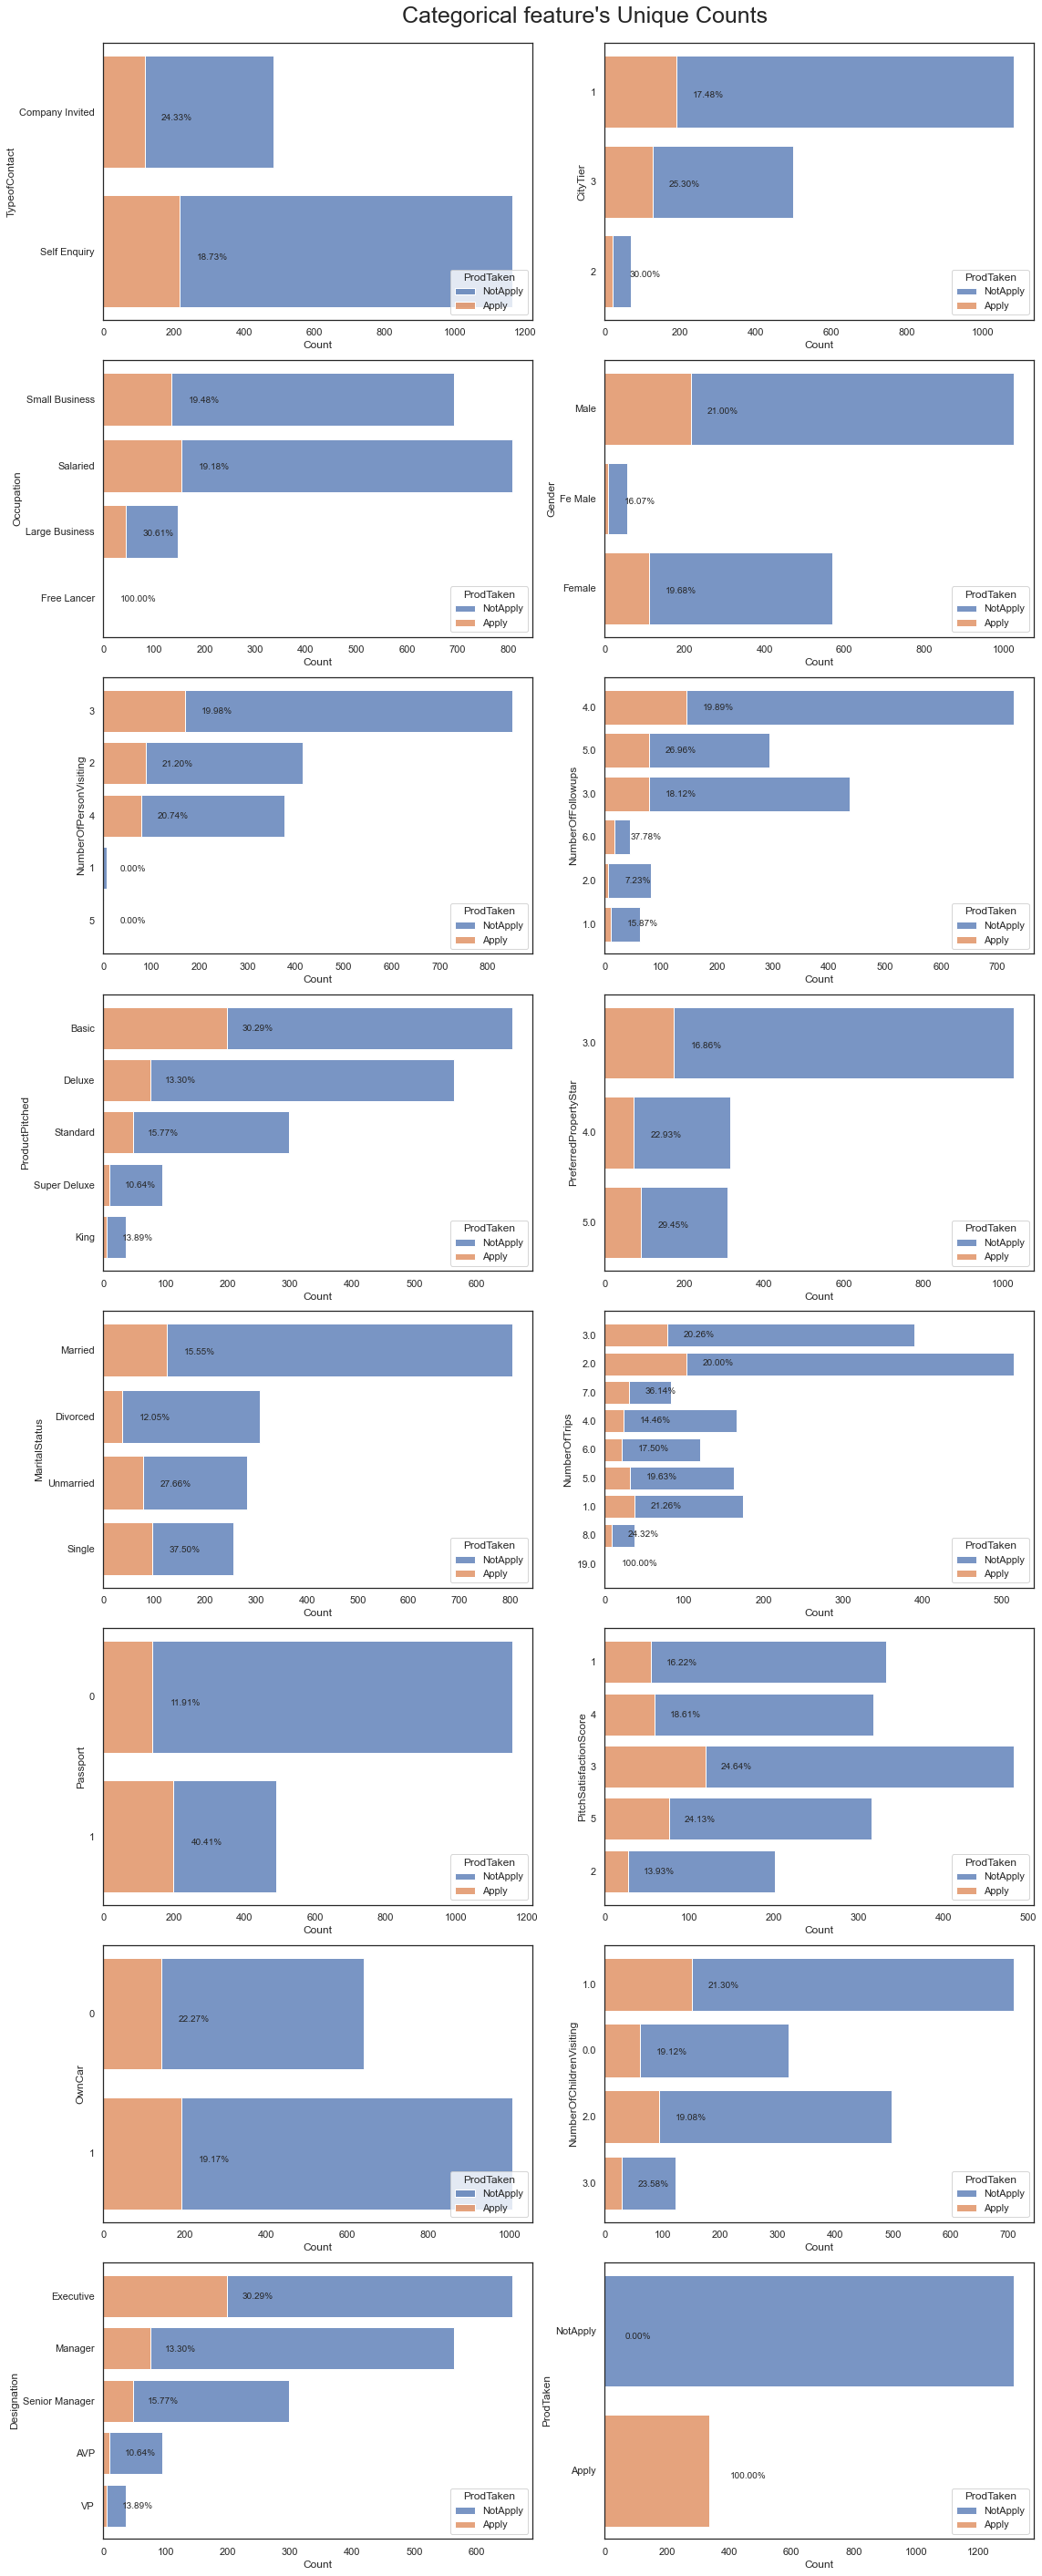

In [152]:
show_unique_counts(df, 'ProdTaken', row=8, column=2)

### 양적 변수 시각화

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

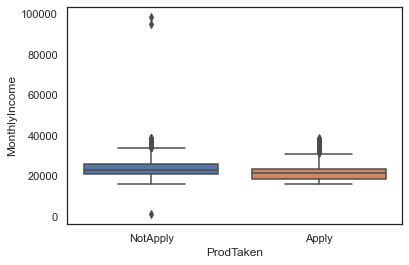

In [81]:
sns.boxplot(data=df, y='MonthlyIncome', x='ProdTaken')

<AxesSubplot:xlabel='Designation', ylabel='MonthlyIncome'>

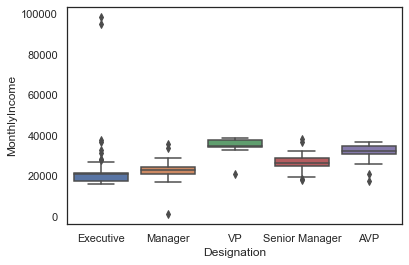

In [91]:
sns.boxplot(data=df, y='MonthlyIncome', x='Designation')

`-` 여행상품을 신청하는 사람들은 그렇지 않은 사람보다 평균적으로 급여가 더 적다 (하지만 거의 차이가 없다)

`-` 결측치는 직급의 중앙값으로 채우면 될 듯하다 (직업에 따른 평균적인 급여 차이는 없었다)

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

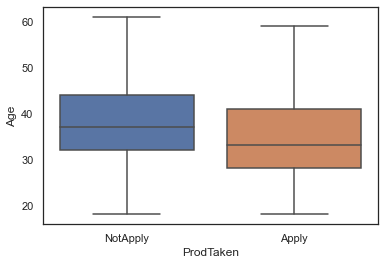

In [84]:
sns.boxplot(data=df, y='Age', x='ProdTaken')

`-` 여행상품을 신청하는 사람들은 그렇지 않은 사람보다 평균적으로 더 젊다

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

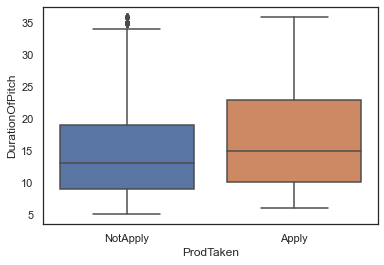

In [85]:
sns.boxplot(data=df, y='DurationOfPitch', x='ProdTaken')

`-` 여행상품을 신청하는 사람들은 그렇지 않은 사람보다 평균적으로 제공받은 프레젠테이션 기간이 더 길다

## 모델링

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
def OOF_predict(model, X, y, test, SKfold, stratify):
    """
    Out-Of-Fold 방식을 통해 test(numeric)를 예측
    train, valid에 대한 NMAE score와 예측한 test를 return
    """ 
    model_train_score = []
    model_valid_score = []
    model_pred = np.zeros(shape=(test.shape[0]))

    for i, (train_idx, valid_idx) in enumerate(SKfold.split(X, X[stratify])):
        # print(f'({i + 1} / {SKfold.n_splits}) Fold Training......')
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_valid, y_valid = X.iloc[valid_idx], y.iloc[valid_idx]
        
        ## target에 제곱근 변환
        y_train = np.sqrt(y_train)
        
        ## 모델 적합
        model.fit(X_train, y_train)
        
        ## prediction
        train_pred = model.predict(X_train) ## train
        valid_pred = model.predict(X_valid) ## valid
        test_pred = model.predict(test) ## test
        
        model_train_score.append(NMAE(np.square(y_train), np.square(train_pred))) ## train NMAE
        model_valid_score.append(NMAE(y_valid, np.square(valid_pred))) ## valid NMAE
        model_pred += np.square(test_pred) / SKfold.n_splits ## test 예측값(k Fold)
              
    return model_train_score, model_valid_score, model_pred

In [ ]:
def OOF_ensemble_model(model_list, X, y, test, SKfold, stratify):
    """
    모델을 OOF 앙상블하여 test(numeric)를 예측
    예측한 test를 return
    """
    test_ensemble_pred = np.zeros(shape=(test.shape[0]))
    for model in tqdm(model_list):
        _, _, test_pred = OOF_predict(model, X, y, test, SKfold, stratify)
        test_ensemble_pred += test_pred / len(model_list)
        
    return test_ensemble_pred

In [ ]:
features = [
            'Income',
            #'Teenhome',
            #'Kidhome',
            'Education',
            #'Marital_Status',
            'NumDealsPurchases', 
            'NumCatalogPurchases',
            #'NumStorePurchases', 
            'TotalPurchases',
            'NumWebPurchases',
            'NumWebVisitsMonth', 
            #'NotSalePurchases',
            #'AcceptedCmpAny',
            'AcceptedCmpAll',
            'Dt_Customer_Year',
            #'Age',
           ]

interaction_features = [
                        #'Teenhome_Income',
                        #'Kidhome_NumDealsPurchases',
                        #'Teenhome_NumWebVisitsMonth',
                        #'Teenhome_TotalPurchases',
                        #'AcceptedCmpAny_Income',
                        'AcceptedCmpAll_Income',
                        #'Kidhome_Income',
                       ]

In [ ]:
RF = RandomForestRegressor(n_estimators=500,
                           max_depth=16,
                           min_samples_split=2,
                           random_state=SEED)

EXT = ExtraTreesRegressor(n_estimators=500,
                          max_depth=15,
                          min_samples_split=2,
                          random_state=SEED)

GD = GradientBoostingRegressor(n_estimators=700,
                               learning_rate=0.03,
                               max_depth=6,
                               min_samples_split=3,
                               random_state=SEED)

CB = CatBoostRegressor(n_estimators=1000,
                       learning_rate=0.05,
                       max_depth=6,
                       random_state=SEED,
                       verbose=0)

XGB = XGBRegressor(n_estimators=550,
                   learning_rate=0.05,
                   max_depth=6,
                   random_state=SEED)

In [ ]:
_, RF_valid_NMAE1, RF_test_pred1 = OOF_predict(RF, df4, target, test4, skfold1, stratify='AcceptedCmpAll')
_, RF_valid_NMAE2, RF_test_pred2 = OOF_predict(RF, df4, target, test4, skfold2, stratify='AcceptedCmpAll')

In [ ]:
np.mean(RF_valid_NMAE1 + RF_valid_NMAE2), np.std(RF_valid_NMAE1 + RF_valid_NMAE2)